## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, I will be working to understand the results of an A/B test run by an e-commerce website.  MY goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read  `ab_data.csv` data and store it in `df`.

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
df.user_id.nunique()

290584

In [6]:
#check dupicated user id
df.user_id.duplicated().sum()

3894

d. The proportion of users converted.

In [7]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [8]:
df_newp = df[df['landing_page']== 'new_page']
df_newp[df_newp['group'] == 'control']['user_id'].nunique()


1928

In [9]:
df_oldp = df[df['landing_page']== 'old_page']
df_oldp[df_oldp['group'] == 'treatment']['user_id'].nunique()


1965

In [10]:
1928+1965


3893

f. Do any of the rows have missing values?

In [11]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. we will be creating a new dataset that meets the specifications and store your new dataframe in **df2**.

In [12]:
df2 = df[((df['landing_page']=='old_page')==(df['group']== 'control'))&((df['landing_page'] == 'new_page')==(df['group']== 'treatment'))]
df2.landing_page.value_counts()

new_page    145311
old_page    145274
Name: landing_page, dtype: int64

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2[df2.user_id.duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [16]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
df2.drop_duplicates(subset= ['user_id'], inplace = True)

<ipython-input-17-8426ff0946e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(subset= ['user_id'], inplace = True)


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
df2[df2.group == "control" ]['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
df2[df2.group == "treatment" ]['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [21]:
df2[df2.landing_page == 'new_page'].shape[0]/df2.shape[0]

0.5000619442226688

In [22]:
#presrntin duration of the expriminet
df2['timestamp'].min() ,df2['timestamp'].max()


('2017-01-02 13:42:05.378582', '2017-01-24 13:41:54.460509')

## conclutions

- conversion rate in control group slightly higher than conversion rate in the expermint
- old and new page were fairly distrupted among individuals by probiabity of indvidials to recive new page of 50%
- staying with old page will be more relaistic and better rather than turning to the new page. - or we might extend timing of the test -


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.




$$H_0: p_{new} - p_{old} < = 0$$


$$H_1: p_{new} - p_{old} > 0$$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

We will Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

We will Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem. 

In [23]:
df2.sample(3)

,user_id,timestamp,group,landing_page,converted
234444,931604,2017-01-06 15:00:46.012236,control,old_page,0
103450,728105,2017-01-10 03:39:17.530547,treatment,new_page,1
217450,731948,2017-01-07 16:38:03.966590,treatment,new_page,0


a. What is the **conversion rate** for $p_{new}$ under the null? 

In [24]:

p_new = df2['converted'].mean()
p_new


0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [25]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

In [26]:
#calcaulate obs diff
obs_diff = p_new - p_old
obs_diff

0.0

c. What is $n_{new}$, the number of individuals in the treatment group?

In [27]:
n_new = df2[df2.group == 'treatment']['user_id'].count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [28]:
n_old = df2[df2.group == 'control'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [29]:
prop_notc = 1-p_new
prop_notc

0.8804029127550037

In [30]:
new_page_converted = np.random.choice([1,0] , size = 145310 ,p=[p_new,(1-p_new) ])
p_new = new_page_converted.mean()
p_new

0.12018443328057257

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
old_page_converted =np.random.choice([0,1] , size =145274,p=[(1-p_old), p_old])
p_old = old_page_converted.mean()
p_old

0.12003524374630009

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [39]:
 p_new - p_old


0.00014918953427248138

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [100]:
p_diffs = []
for _ in range(10000):
    converted_means_new = np.random.choice([0,1] , size = (145310) ,p=[.8804,0.1196 ]).mean()
    converted_means_old = np.random.choice([0,1] , size = (145274) ,p=[.8804,0.1196 ]).mean()
    p_diffs.append( converted_means_new -  converted_means_old 
    

In [98]:
#suggested cal more than 100x faster than a standard python calculation (for loop )
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [34]:
#calcluate actul diffrence
Act_diffrence  = df2[df2.group == 'treatment']['converted'].mean() - df2[df2.group == 'control']['converted'].mean()
Act_diffrence

-0.0015782389853555567

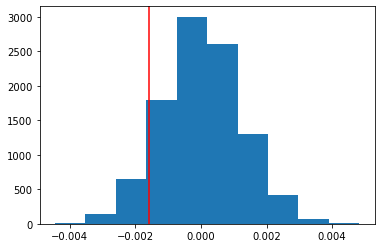

In [89]:
plt.hist(p_diffs);
#ploting the actul diff observed from the dataset for easy visluauztion
plt.axvline(Act_diffrence, c='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [101]:
p_diffs = np.array(p_diffs)
(p_diffs>Act_diffrence).mean()


0.9034

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?



- As p value of 0.90 is more than the type 1 error of .05 which means probiibaltes of obtain our statiscica from the null hypthosis is true 
- So There is no diffrence between the old page and the new page on the individulas to convert or we can sat that the old page have more effect on the  converted indivduals than the newpage 
- The diffrence here is not staticly signafant 
- So we fail to reject the null hypthosis



## using bootstrping sample to simulate the diffrence in means



In [43]:
converted_old = df2[df2.landing_page == 'old_page']['converted'].mean()
converted_new = df2[df2.landing_page == 'new_page']['converted'].mean()
observed_diff = converted_new - converted_old
observed_diff



-0.0015782389853555567

In [108]:
#using bootstrping sample to simulate the diffrence in means
diffs = []
for _ in range(10000):
    boot_sample = df2.sample(10000 , replace = True)
    converted_old = boot_sample[boot_sample.landing_page == 'old_page']['converted'].mean()
    converted_new = boot_sample[boot_sample.landing_page == 'new_page']['converted'].mean()
    diffs.append( converted_new -  converted_old )
    

    

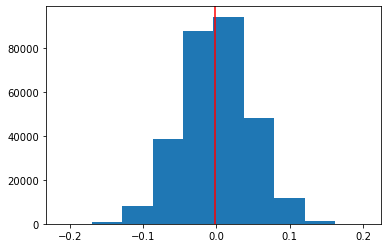

In [87]:
null = np.random.normal (0 , np.std(diffs), df2.shape[0])
plt.hist(null);
plt.axvline(observed_diff, c='red');

In [110]:
diffs = np.array(diffs)
(diffs > observed_diff).mean()


0.4988

- As p value of 0.4995 is more than the type 1 error of .05 which means probiibaltes of obtain our statiscica from the null hypthosis is true
- So There is no diffrence between the old page and the new page on the individulas to convert or we can sat that the old page have more effect on the converted indivduals than the newpage
- The diffrence here is not staticly signafant
- So we fail to reject the null hypthosis

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [122]:
import statsmodels.api as sm
convert_old = df2[(df2.group == 'control')& (df2.converted == 1)].shape[0]
convert_new = df2[(df2.group == 'treatment')& (df2.converted == 1)].shape[0]
n_old = df2[df2.group == 'control'].shape[0]
n_new = df2[df2.group == 'treatment'].shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [124]:
stat, pval = sm.stats.proportions_ztest([convert_old , convert_new],[ n_old ,n_new] ,alternative='smaller')
print(f'zscore = {stat} ,p_value = {pval}')

zscore = 1.3109241984234394 ,p_value = 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

With p value of 0.905 yes it is supported what i conclude from j and k part which is we fail to reject the null hpothises since the diffrence between old page and new page on the indivduals to cinvert is not staticly signfcant
 -  z score indicate our date  1.31 sd from the mean which means 68% of our values within one sd from the mean
 - No need to change to the new page

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, we will see that the result we achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, type of regression should you be performing in this case is

## Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, we first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [59]:
df2[['ab_page','control']] = pd.get_dummies(df2['landing_page'])
df2 = df2.drop('control' , axis= 1)
df2['intercept'] = 1 
df2.head()


,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. We will Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [44]:
logit_mod = sm.Logit(df2['converted'] , df2[['intercept' , 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


 summary of our model below, and use it as necessary to answer the following questions.

In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 13 Mar 2021   Pseudo R-squ.:               8.077e-06
Time:                        14:20:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [45]:
#expon
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value we found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

## Interprtations

- Indvidual will convert apprxmitly .985 time if he/she uses the new page 
- The null hypothesis here  states that the slope (diffrence between newpage and old page of the ab page) is equal to zero, and the alternative hypothesis states that the slope( (diffrence between newpage and old page of the ab page) is not equal to zero.
- so we can conclude that adding new page is not staticly signficant to have more converted customers as p value is gretaer than .005 
- The diffrence between the old page and new page on the converted customers equls to zero 
- so we fail to reject the null hypothis 

f. Now, you are considering other things that might influence whether or not an individual converts. we will Discuss why it is a good idea to consider other factors to add into your regression model and disadvantages to adding additional terms into our regression model.

- since our model dose not show any statical signicance when we have our  varible 
- adding other factor to our model helps us interpret our response variable better spcially when your explantory variable of x1 realted to response variable y is depandant to other explntory vriable x2 
- so we might go and add an intercation varible between them 
- The disadvantage might occurs when tow varibales have realtion with each other (multiclinrity)
- The disadvantge is interprt higher order term like interaction is more complex

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. we will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  

In [47]:
countries_df = pd.read_csv('countries.csv')
df2_new = countries_df.merge(df2,on = 'user_id')
df2_new.head()

,user_id,country,timestamp,group,landing_page,converted,ab_page,intercept
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [48]:
df2_new[['US' ,'UK','CA']]= pd.get_dummies(df2_new['country'])
df2_new = df2_new.drop('CA' , axis= 1)

In [49]:
logit_mod = sm.Logit(df2_new['converted'] ,df2_new[['intercept' , 'ab_page' , 'US' ,'UK']])
rseult = logit_mod.fit()
rseult.summary()   

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 14 Mar 2021   Pseudo R-squ.:               2.323e-05
Time:                        03:02:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [51]:
np.exp(rseult.params)

intercept    0.136795
ab_page      0.985168
US           0.960062
UK           1.009932
dtype: float64

## Interpretations
- individuall will convert apprxmitly .985 time if he/she uses the new page holding other varible is constant 
- if an individual from US will be .960 likely more to convert than individual from canda holding other variable constant .
- if an individual from UK will be 1.009 likely more to convert than individual from canda holding other variable constant
- There is no segnicance diffrence on the converted persons if a person from spsfic country it is almost same . 


h. Though we have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  


In [55]:
#create matrix of intraction between page and country 
from patsy import dmatrices
y,x = dmatrices('converted ~ (country)*(landing_page) ', df2_new, return_type = 'dataframe')
#change array into a contiguous flattened array.
y = np.ravel(y)
#craete the logistic model 
logit_mod = sm.Logit(y,x)
rseult = logit_mod.fit()
rseult.summary()   

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 14 Mar 2021   Pseudo R-squ.:               3.482e-05
Time:                        14:40:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -2.0715      0.037    -55.798      0.000      -2.144      -1.999
country[T.UK]                              0.0901      0.040      2.225      0.026       0.011       0.169
country[T.US]                              0.0644      0.038      1.679      0.093      -0.011       0.140
landing_page[T.old_page]                   0.0674      0.052      1.297      0.195      -0.034       0.169
country[T.UK]:landing_page[T.old_page]    -0.0783      0.057     -1.378      0.168      -0.190       0.033
country[T.US]:landing_page[T.old_page]    -0.0469      0.054     -0.872      0.383      -0.152       0.059
==========================================================================================================
"""

In [57]:
np.exp(rseult.params)

Intercept                                 0.126002
country[T.UK]                             1.094247
country[T.US]                             1.066532
landing_page[T.old_page]                  1.069775
country[T.UK]:landing_page[T.old_page]    0.924703
country[T.US]:landing_page[T.old_page]    0.954198
dtype: float64

In [58]:
1/np.exp(rseult.params)

Intercept                                 7.936353
country[T.UK]                             0.913871
country[T.US]                             0.937618
landing_page[T.old_page]                  0.934776
country[T.UK]:landing_page[T.old_page]    1.081428
country[T.US]:landing_page[T.old_page]    1.048001
dtype: float64

## Interpretation
- An individual from Canda using New apge will be 1.081428 likely more to convert than individual from US holding other variable constant .
 - An individual from Canda using New apge will be 1.048001 likely more to convert than individual from UK holding other variable constant
 - There is no signficance diffrence in convertion rate if person uses old or new page or he is from specfic country.

## conclutions
we have performed three ways to test whether new page will make conversion more than the old page ,the three ways prooves that etier the old page is better or there is no sifnifcance diffrence to convert to new page
